## Setting the analytical solution
Make sure they agree with FLASH/flash.par setting

In [1]:
# import library
import numpy as np
import rclib.IO as rcIO # make sure the lib is linked to the same directory
import rclib.plot as rcplt

second      = 1.
centimeter  = 1.
gram        = 1.
erg         = 1.

millisecond = 1.0e-3 * second
meter       = 1e2 * centimeter
kilometer   = 1e3 * meter

Gravitational_constant = 6.673e-8                   # CGS
light_speed            = 3e10 * centimeter / second # [cm s-1]

gamma       = 1.33
profilename = 'Yahil_Gam133.dat'

collapse_time     = 150 * millisecond
central_density   = 7.0e9*gram/(centimeter**3) # [g cm^-3]
central_pressure  = 6.0e27*erg/(centimeter**3)# [erg cm^-3]
core_radius_order = 4.98 # 10^order in [km]
number_element    = 128

kappa = central_pressure / pow( central_density, gamma )
radius = np.logspace(-1, core_radius_order, num=number_element) * kilometer # km

print('kappa =', kappa)

[X1D, D1D, V1D, M1D] = rcIO.IO_YahilProfile(profilename)

kappa = 483248881117108.56
Using YahilProfile/Yahil_Gam133.dat


## Read-in FLASH data and plot data venus analytical solution on same plot

filename = yahil1d_hdf5_chk_0150
time = 0.14950002829083572  s
variable.shape = grid( 10070 ) * sub( 1 ) =  (10070,)


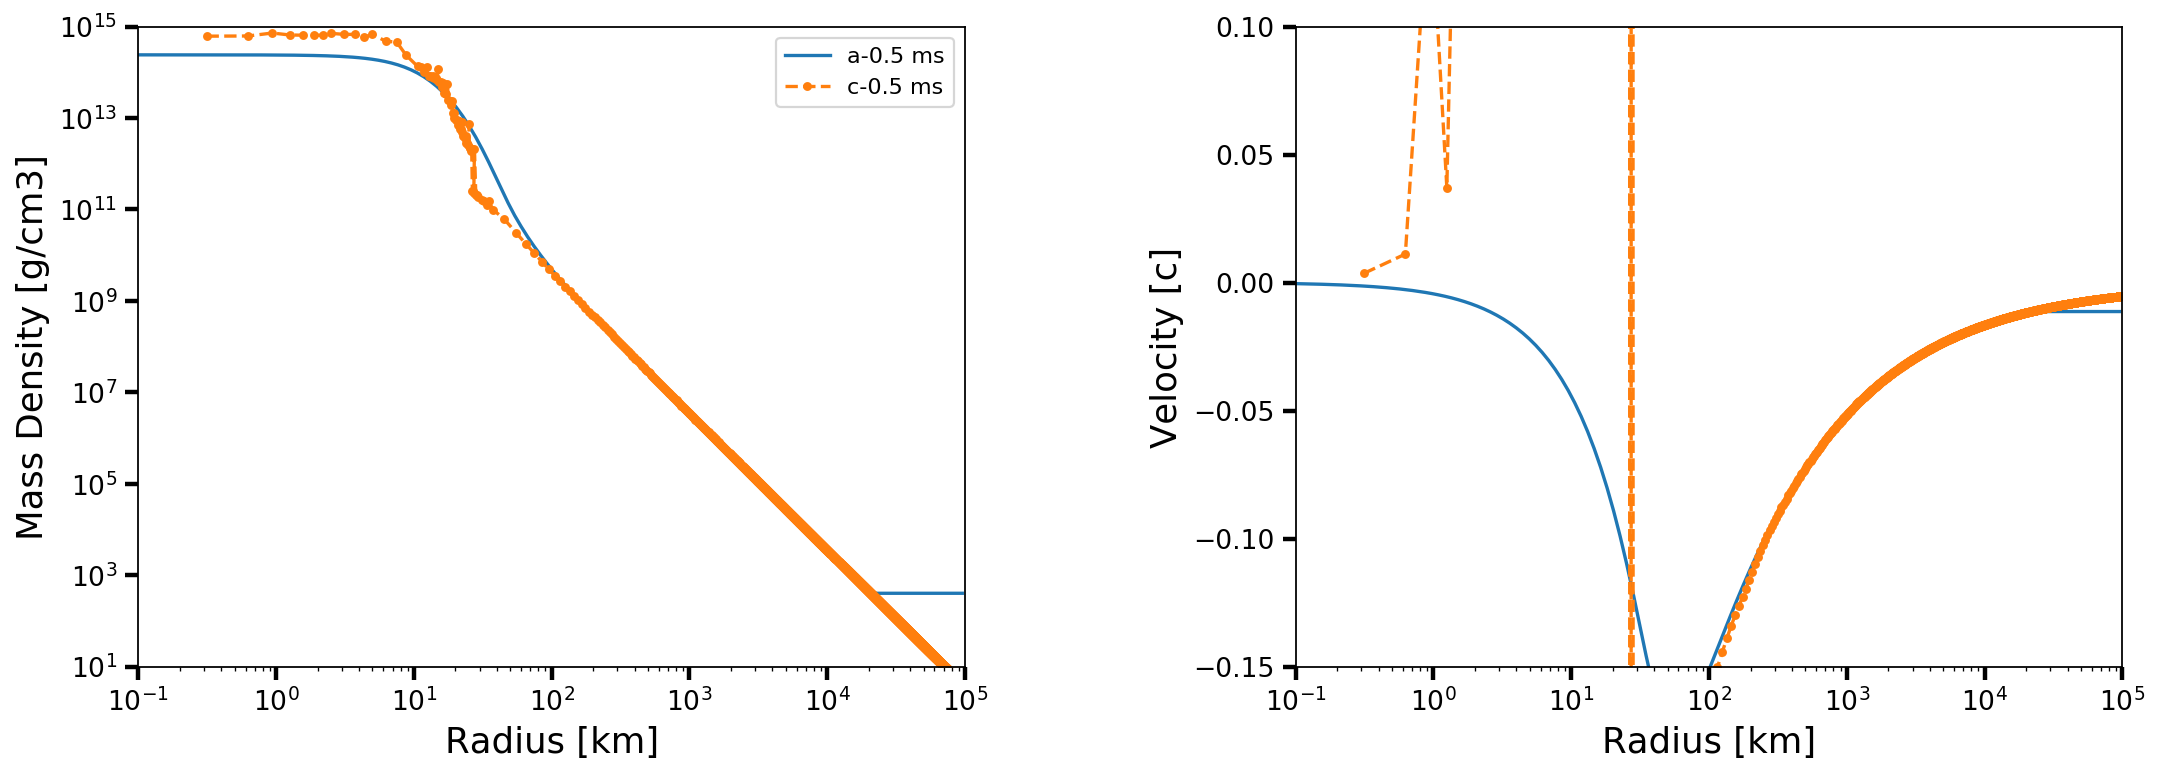

In [4]:
# 0 - initial or ID * 0.001s  (98, 51.5) (145, 5) (148, 2) (150, 0.5)
for fileID in range(150,151):
    # data in
    [ time, radius_1dx, dens_1dx, velx_1dx ] \
    = rcIO.FLASH_IO_1D( '', 'yahil1d_hdf5_chk_', fileID, 'nodescribe' ) 
    imag = rcplt.plot_FLASH_Yahil_vs_Analytical\
    ( Gravitational_constant, second, kilometer, light_speed, collapse_time, \
     kappa, gamma, radius, X1D, D1D, V1D, M1D, \
     time, radius_1dx, dens_1dx, velx_1dx )
    imag.savefig('termp_png/image%03d.png'%fileID)